시작

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None) 
# 모든 컬럼 다 출력 (확인용)

데이터 로딩

In [31]:
print("Loading datasets...")
properties_2016 = pd.read_csv('properties_2016.csv', low_memory = False)
properties_2017 = pd.read_csv('properties_2017.csv', low_memory = False)
train_2016 = pd.read_csv('train_2016_v2.csv', low_memory = False)
train_2017 = pd.read_csv('train_2017.csv', low_memory = False)
sample_submission = pd.read_csv('sample_submission.csv', low_memory = False)
print("data loaded")

Loading datasets...
data loaded


데이터 확인

In [33]:
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [34]:
properties_2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


데이터 shape 확인

In [36]:
print("Prop 2016 :", properties_2016.shape)
print("Prop 2017 :", properties_2017.shape)
print("Train 2016 :", train_2016.shape)
print("Train 2017 :", train_2017.shape)
print("Sample Submission :", sample_submission.shape)

Prop 2016 : (2985217, 58)
Prop 2017 : (2985217, 58)
Train 2016 : (90275, 3)
Train 2017 : (77613, 3)
Sample Submission : (2985217, 7)


기본정보 출력   
결측값 퍼센트 출력   
feature들 분포 확인   

In [38]:
def explore_data(df, name) :
    print(f"\n 데이터 확인: {name}")
    print("-"*50)

    # 기본정보
    print(f"Shape: {df.shape}")
    print("\nColumns & data Types:")
    print(df.dtypes.value_counts())
    print("-"*50)

    # 결측치 정보
    missing_percent = df.isnull().mean() * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

    if not missing_percent.empty:
        print("\nMissing Values (%):")
        print(missing_percent)

        # 결측치 정보 시각화
        plt.figure(figsize=(10, 4))
        sns.barplot(x=missing_percent.index, y=missing_percent.values)
        plt.xticks(rotation = 90)
        plt.ylabel("Missing Values (%)")
        plt.title(f"Missing data in {name}")
        plt.show()

    # 변수들 분포 확인
    df.hist(figsize = (20, 20 ), bins = 30)
    plt.suptitle(f"Numerical Feature Distributions - {name}", fontsize = 14)
    plt.show()


 데이터 확인: Prop 2016
--------------------------------------------------
Shape: (2985217, 58)

Columns & data Types:
float64    52
object      5
int64       1
Name: count, dtype: int64
--------------------------------------------------

Missing Values (%):
storytypeid                     99.945599
basementsqft                    99.945465
yardbuildingsqft26              99.911330
fireplaceflag                   99.827048
architecturalstyletypeid        99.796966
typeconstructiontypeid          99.773986
finishedsquarefeet13            99.743000
buildingclasstypeid             99.576949
decktypeid                      99.427311
finishedsquarefeet6             99.263002
poolsizesum                     99.063385
pooltypeid2                     98.925539
pooltypeid10                    98.762603
taxdelinquencyflag              98.108613
taxdelinquencyyear              98.108546
hashottuborspa                  97.688141
yardbuildingsqft17              97.308236
finishedsquarefeet15           

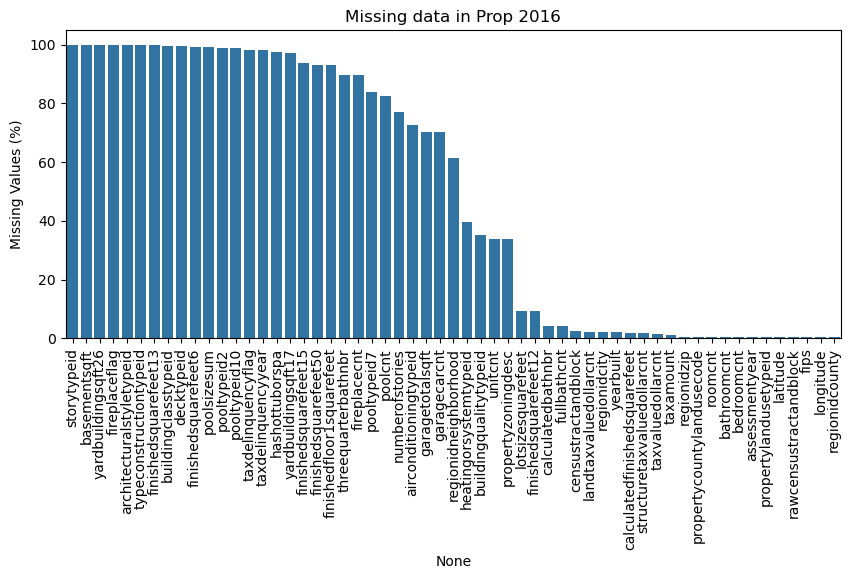

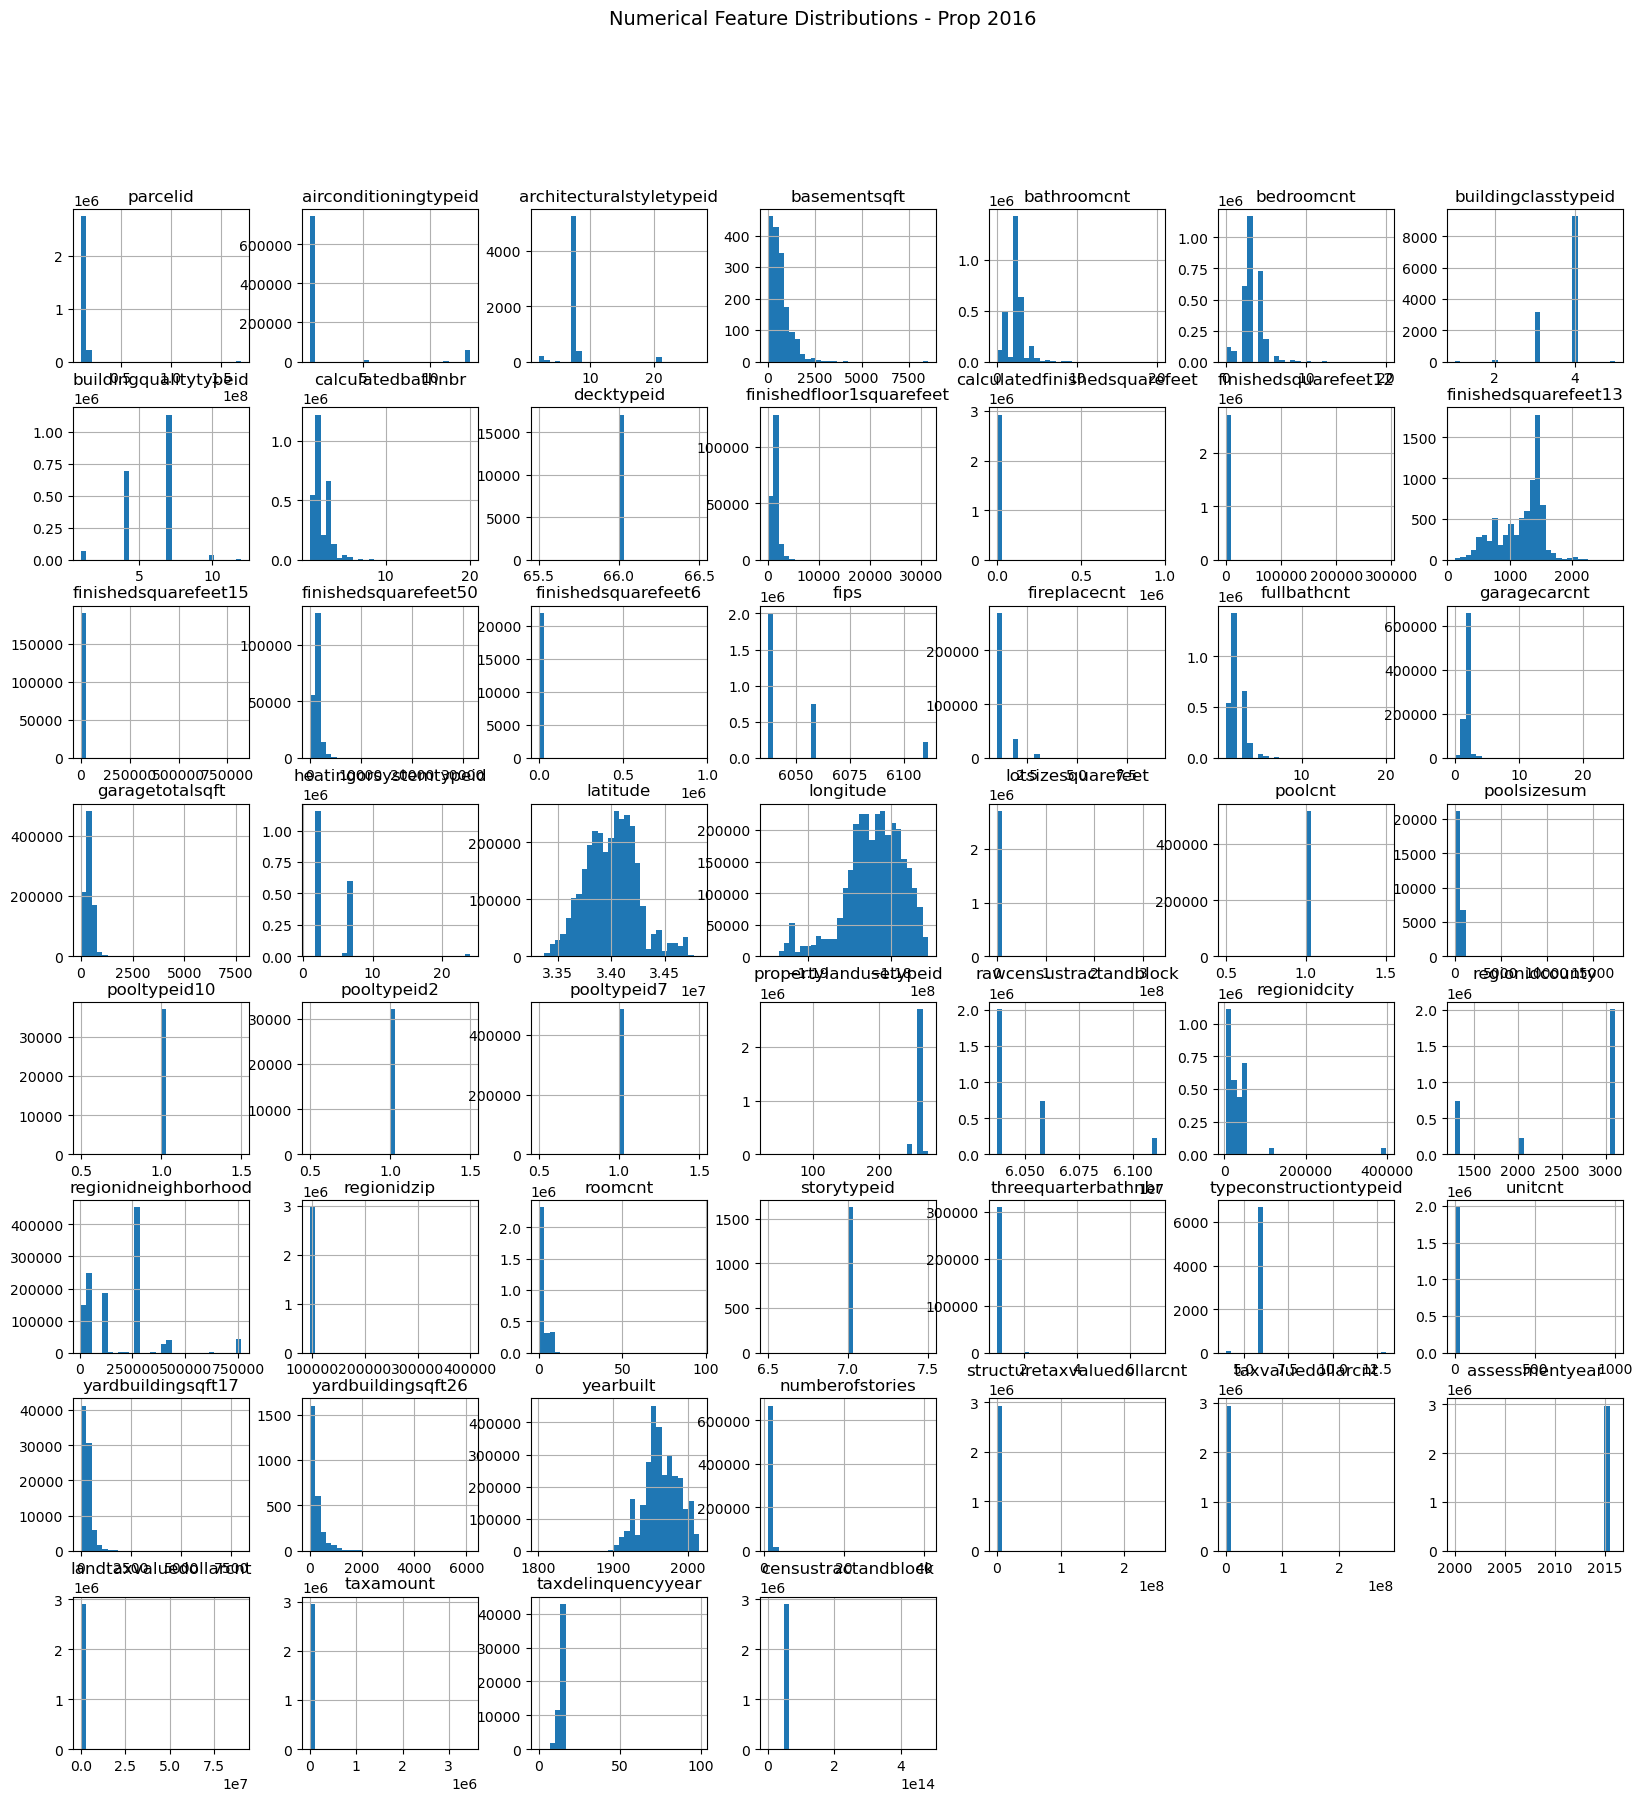

In [39]:
explore_data(properties_2016, "Prop 2016")

In [40]:
def drop_high_missing_cols(df, name, threshold = 0.8) :
    missing_percent = df.isnull().mean()
    cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()

    print(f"Dropping {len(cols_to_drop)} columns from {name} (>{threshold*100}% missing values)")

    return df.drop(columns=cols_to_drop)

In [41]:
properties_2016 = drop_high_missing_cols(properties_2016, "Prop 2016")
properties_2017 = drop_high_missing_cols(properties_2017, "Prop 2017")

print(f"Properties 2016 shape: {properties_2016.shape}")
print(f"Properties 2017 shape: {properties_2017.shape}")

Dropping 24 columns from Prop 2016 (>80.0% missing values)
Dropping 24 columns from Prop 2017 (>80.0% missing values)
Properties 2016 shape: (2985217, 34)
Properties 2017 shape: (2985217, 34)


In [42]:
properties_2016.dtypes

parcelid                          int64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood            float64
regionidzip                     float64
roomcnt                         float64


두 데이터셋을 비교
같은 칼럼이 있는지 확인하고, 요약 통계량 확인하고, 같은 parcelid가 있는지 확인하는 작업

In [44]:
def compare_datasets(df1, df2, name1 = "Dataset 1", name2 = "Dataset 2") :
    print(f"\n Compare {name1} and {name2}")
    print("-"*50)

    # 칼럼 같은지 확인
    cols1, cols2 = set(df1.columns), set(df2.columns)
    common_cols = cols1.intersection(cols2)
    diff_cols1 = cols1 - cols2
    diff_cols2 = cols2 - cols1

    print(f"Common columns : {len(common_cols)}")
    print(f"Comlumns in only {name1} : {len(diff_cols1)} -> {(diff_cols1)}")
    print(f"Comlumns in only {name2} : {len(diff_cols2)} -> {(diff_cols2)}")

    common_df1 = df1[list(common_cols)].describe()
    common_df2 = df2[list(common_cols)].describe()

    print("\nSummary Statistics of Common Columns:")
    diff_stats = common_df1.compare(common_df2)
    if diff_stats.empty :
        print("no difference between common columns")
    else:
        print(diff_stats)

    # parcelid 확인
    if 'parcelid' in common_cols :
        parcel_diff = set(df1['parcelid']) ^ set(df2['parcelid'])
        print(f"\nParcelId Differences : {len(parcel_diff)} unique parcelids found in one dataset but no the other")
    else:
        print("parcelid column not found in both datasets.")

In [45]:
compare_datasets(train_2016, train_2017, "train 2016", "train 2017")


 Compare train 2016 and train 2017
--------------------------------------------------
Common columns : 3
Comlumns in only train 2016 : 0 -> set()
Comlumns in only train 2017 : 0 -> set()

Summary Statistics of Common Columns:
           logerror                    parcelid              
               self         other          self         other
count  90275.000000  77613.000000  9.027500e+04  7.761300e+04
mean       0.011457      0.016755  1.298466e+07  1.300781e+07
std        0.161079      0.170887  2.504510e+06  3.518717e+06
min       -4.605000     -4.655420  1.071174e+07  1.071186e+07
25%       -0.025300     -0.024325  1.155950e+07  1.153821e+07
50%        0.006000      0.006670  1.254734e+07  1.253004e+07
75%        0.039200      0.039295  1.422755e+07  1.421101e+07
max        4.737000      5.262999  1.629608e+08  1.676893e+08

ParcelId Differences : 162856 unique parcelids found in one dataset but no the other


In [46]:
compare_datasets(properties_2016, properties_2017, 'train 2016', 'train 2017')


 Compare train 2016 and train 2017
--------------------------------------------------
Common columns : 34
Comlumns in only train 2016 : 0 -> set()
Comlumns in only train 2017 : 0 -> set()

Summary Statistics of Common Columns:
      taxvaluedollarcnt               calculatedbathnbr                \
                   self         other              self         other   
count      2.942667e+06  2.950951e+06      2.856305e+06  2.868061e+06   
mean       4.204790e+05  4.435279e+05      2.299263e+00  2.303826e+00   
std        7.263467e+05  8.163366e+05      1.000736e+00  1.003243e+00   
min                 NaN           NaN               NaN           NaN   
25%        1.796750e+05  1.882200e+05               NaN           NaN   
50%        3.060860e+05  3.211610e+05               NaN           NaN   
75%        4.880000e+05  5.140720e+05               NaN           NaN   
max        2.827860e+08  3.196225e+08      2.000000e+01  3.200000e+01   

      propertylandusetypeid              

변수 타입 확인

In [48]:
def analyze_variable_types(df, name) :
    print(f"\n Analyzing Variable Types in {name}")
    print("-"*50)

    var_types = df.dtypes.value_counts()
    print(df.dtypes)
    print(var_types)

    # 변수 타입 분포 확인
    plt.figure(figsize = (8, 5))
    var_types.plot(kind = 'bar')
    plt.title(f"Variable Type Distribution in {name}")
    plt.xlabel("Data type")
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.show()


 Analyzing Variable Types in prop 2016
--------------------------------------------------
parcelid                          int64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood         

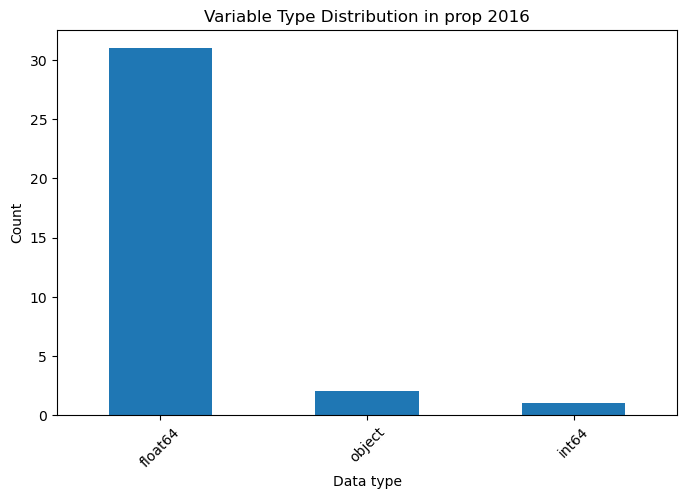

In [49]:
analyze_variable_types(properties_2016, 'prop 2016')


 Analyzing Variable Types in prop 2017
--------------------------------------------------
parcelid                          int64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood         

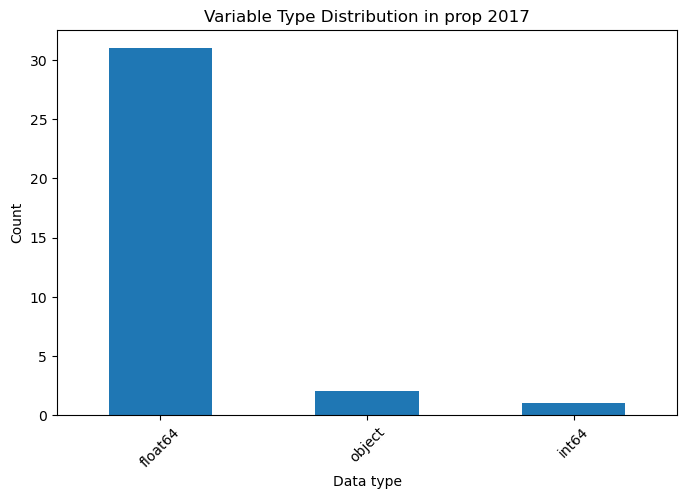

In [50]:
analyze_variable_types(properties_2017, 'prop 2017')

In [51]:
properties_2016.head(1)

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN


In [52]:
properties_2017.head(10)

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,NaN,0.0,0.0,NaN,NaN,73026.0,NaN,6037.0,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,2.0,1959.0,1.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,NaN,0.0,0.0,6.0,NaN,5068.0,NaN,6037.0,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,1948.0,1.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,NaN,0.0,0.0,NaN,NaN,1776.0,NaN,6037.0,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,1.0,1947.0,1.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN
5,10898347,NaN,0.0,0.0,4.0,NaN,2400.0,NaN,6037.0,NaN,NaN,NaN,NaN,34171873.0,-118380906.0,2500.0,1210,31.0,LAC4,6.037125e+07,12447.0,3101.0,46795.0,96446.0,0.0,NaN,1943.0,1.0,179072.0,287634.0,2016.0,108562.0,3661.28,NaN
6,10933547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,34131929.0,-118351474.0,NaN,010V,260.0,LAC2,6.037144e+07,12447.0,3101.0,274049.0,96049.0,0.0,NaN,NaN,NaN,404013.0,563029.0,2016.0,159016.0,6773.34,NaN
7,10940747,NaN,0.0,0.0,NaN,NaN,3611.0,NaN,6037.0,NaN,NaN,NaN,NaN,34171345.0,-118314900.0,5333.0,1210,31.0,BUC4YY,6.037311e+07,396054.0,3101.0,NaN,96434.0,0.0,NaN,1946.0,1.0,103553.0,698984.0,2016.0,595431.0,7857.84,NaN
8,10954547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,34218210.0,-118331311.0,145865.0,010D,269.0,BUR1*,6.037310e+07,396054.0,3101.0,NaN,96436.0,0.0,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
9,10976347,NaN,0.0,0.0,4.0,NaN,3754.0,NaN,6037.0,NaN,NaN,NaN,NaN,34289776.0,-118432085.0,7494.0,1210,31.0,SFC2*,6.037320e+07,47547.0,3101.0,NaN,96366.0,0.0,NaN,1978.0,1.0,221771.0,265184.0,2016.0,43413.0,4054.76,NaN


필요없는 칼럼 갖다버리기

In [54]:
drop_cols = ['calculatedbathnbr', 'fullbathcnt', 'latitude', 'longitude', 
    'propertycountylandusecode', 'censustractandblock', 'regionidneighborhood', 
    'unitcnt', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'assessmentyear', 'airconditioningtypeid',
    'heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc']

properties_2016_cleaned = properties_2016.drop(columns=drop_cols, errors = 'ignore')
properties_2017_cleaned = properties_2017.drop(columns=drop_cols, errors = 'ignore')

In [68]:
properties_2016_cleaned.head(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,10754147,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,85768.0,269.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,NaN,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,4083.0,261.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,NaN,NaN,NaN
2,10843547,0.0,0.0,73026.0,NaN,6037.0,NaN,NaN,63085.0,47.0,6.037703e+07,51617.0,3101.0,96095.0,0.0,NaN,NaN,20800.37
3,10859147,0.0,0.0,5068.0,NaN,6037.0,NaN,NaN,7521.0,47.0,6.037141e+07,12447.0,3101.0,96424.0,0.0,1948.0,1.0,14557.57
4,10879947,0.0,0.0,1776.0,NaN,6037.0,NaN,NaN,8512.0,31.0,6.037123e+07,12447.0,3101.0,96450.0,0.0,1947.0,NaN,5725.17
5,10898347,0.0,0.0,2400.0,NaN,6037.0,NaN,NaN,2500.0,31.0,6.037125e+07,12447.0,3101.0,96446.0,0.0,1943.0,1.0,3661.28
6,10933547,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,NaN,260.0,6.037144e+07,12447.0,3101.0,96049.0,0.0,NaN,NaN,6773.34
7,10940747,0.0,0.0,3611.0,NaN,6037.0,NaN,NaN,5333.0,31.0,6.037311e+07,396054.0,3101.0,96434.0,0.0,1946.0,1.0,7857.84
8,10954547,0.0,0.0,NaN,NaN,6037.0,NaN,NaN,145865.0,269.0,6.037310e+07,396054.0,3101.0,96436.0,0.0,NaN,NaN,NaN
9,10976347,0.0,0.0,3754.0,NaN,6037.0,NaN,NaN,7494.0,31.0,6.037320e+07,47547.0,3101.0,96366.0,0.0,1978.0,1.0,4054.76


In [70]:
missing_percent_v2 = properties_2016_cleaned.isnull().mean() * 100
print(missing_percent_v2)

parcelid                         0.000000
bathroomcnt                      0.383959
bedroomcnt                       0.383557
calculatedfinishedsquarefeet     1.861339
finishedsquarefeet12             9.246664
fips                             0.383121
garagecarcnt                    70.411967
garagetotalsqft                 70.411967
lotsizesquarefeet                9.248875
propertylandusetypeid            0.383121
rawcensustractandblock           0.383121
regionidcity                     2.105207
regionidcounty                   0.383121
regionidzip                      0.468308
roomcnt                          0.384394
yearbuilt                        2.007492
numberofstories                 77.151778
taxamount                        1.046825
dtype: float64


결측치 채우기   
최빈값: 범주형  
중위수: 숫자변수들  
0: 결측치가 0을 뜻하는 경우

In [72]:
fill_mode = [
    'regionidcity', 'regionidzip', 'fips', 'propertylandusetypeid', 
    'rawcensustractandblock', 'regionidcounty'
]
fill_median = [
    'lotsizesquarefeet', 'finishedsquarefeet12', 'yearbuilt', 
    'calculatedfinishedsquarefeet', 'taxamount', 'roomcnt', 
    'bathroomcnt', 'bedroomcnt'
]
fill_zero = ['numberofstories', 'garagecarcnt', 'garagetotalsqft']


for col in fill_mode:
    properties_2017_cleaned[col] = properties_2017_cleaned[col].fillna(properties_2016[col].mode()[0])
    properties_2016_cleaned[col] = properties_2016_cleaned[col].fillna(properties_2016[col].mode()[0])
    

for col in fill_median:
    properties_2017_cleaned[col] = properties_2017_cleaned[col].fillna(properties_2016[col].median())
    properties_2016_cleaned[col] = properties_2016_cleaned[col].fillna(properties_2016[col].median())
    

for col in fill_zero:
    properties_2017_cleaned[col] = properties_2017_cleaned[col].fillna(0)
    properties_2016_cleaned[col] = properties_2016_cleaned[col].fillna(0)

In [73]:
properties_2016_cleaned.head(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,10754147,0.0,0.0,1572.0,1539.0,6037.0,0.0,0.0,85768.0,269.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,1963.0,0.0,3991.78
1,10759547,0.0,0.0,1572.0,1539.0,6037.0,0.0,0.0,4083.0,261.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,1963.0,0.0,3991.78
2,10843547,0.0,0.0,73026.0,1539.0,6037.0,0.0,0.0,63085.0,47.0,6.037703e+07,51617.0,3101.0,96095.0,0.0,1963.0,0.0,20800.37
3,10859147,0.0,0.0,5068.0,1539.0,6037.0,0.0,0.0,7521.0,47.0,6.037141e+07,12447.0,3101.0,96424.0,0.0,1948.0,1.0,14557.57
4,10879947,0.0,0.0,1776.0,1539.0,6037.0,0.0,0.0,8512.0,31.0,6.037123e+07,12447.0,3101.0,96450.0,0.0,1947.0,0.0,5725.17
5,10898347,0.0,0.0,2400.0,1539.0,6037.0,0.0,0.0,2500.0,31.0,6.037125e+07,12447.0,3101.0,96446.0,0.0,1943.0,1.0,3661.28
6,10933547,0.0,0.0,1572.0,1539.0,6037.0,0.0,0.0,7000.0,260.0,6.037144e+07,12447.0,3101.0,96049.0,0.0,1963.0,0.0,6773.34
7,10940747,0.0,0.0,3611.0,1539.0,6037.0,0.0,0.0,5333.0,31.0,6.037311e+07,396054.0,3101.0,96434.0,0.0,1946.0,1.0,7857.84
8,10954547,0.0,0.0,1572.0,1539.0,6037.0,0.0,0.0,145865.0,269.0,6.037310e+07,396054.0,3101.0,96436.0,0.0,1963.0,0.0,3991.78
9,10976347,0.0,0.0,3754.0,1539.0,6037.0,0.0,0.0,7494.0,31.0,6.037320e+07,47547.0,3101.0,96366.0,0.0,1978.0,1.0,4054.76


데이터타입 나열

In [75]:
def list_columns(df, name) :
    print(f"\n Columns in {name} :")
    print("-"*50)
    print(df.dtypes)
    print("\nTotal columns :", df.shape[1])

In [76]:
list_columns(properties_2016_cleaned, "prop 2016")
list_columns(properties_2017_cleaned, "prop 2017")


 Columns in prop 2016 :
--------------------------------------------------
parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
garagecarcnt                    float64
garagetotalsqft                 float64
lotsizesquarefeet               float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
numberofstories                 float64
taxamount                       float64
dtype: object

Total columns : 18

 Columns in prop 2017 :
--------------------------------------------------
parcelid                          int64
bathroomcnt                     float64
bedroomcnt    

훈련데이터 병합

In [78]:
def merge_train_properties(train_df, properties_df, name) :
    print(f"\n Merging {name} train date with properties data")
    merged_df = train_df.merge(properties_df, on = 'parcelid', how = 'left')
    print(f"Merged dataset shape : {merged_df.shape}")
    return merged_df

In [79]:
train_2016_merged = merge_train_properties(train_2016, properties_2016_cleaned, "2016")
train_2017_merged = merge_train_properties(train_2017, properties_2017_cleaned, "2017")


 Merging 2016 train date with properties data
Merged dataset shape : (90275, 20)

 Merging 2017 train date with properties data
Merged dataset shape : (77613, 20)


logerror 분포 (2016 vs 2017)
kernel density function 사용

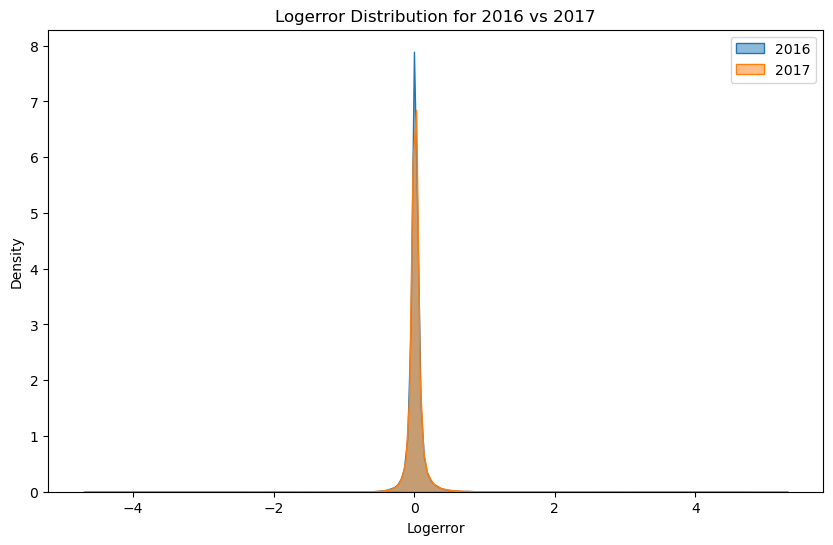

In [81]:
plt.figure(figsize = (10,6))

sns.kdeplot(train_2016['logerror'], label = '2016', fill = True, alpha = 0.5)
sns.kdeplot(train_2017['logerror'], label = '2017', fill = True, alpha = 0.5)

plt.title("Logerror Distribution for 2016 vs 2017")
plt.xlabel("Logerror")
plt.ylabel("Density")
plt.legend()
plt.show()

2016 2017 훈련 데이터 합치기

In [83]:
print("\nCombining 2016 and 2017 train datasets")
train_properties =  pd.concat([train_2016_merged, train_2017_merged], axis = 0).reset_index(drop=True)
print(f"Combined dataset shape : {train_properties.shape}")


Combining 2016 and 2017 train datasets
Combined dataset shape : (167888, 20)


In [84]:
train_properties.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,11016594,0.0276,2016-01-01,2.0,3.0,1684.0,1684.0,6037.0,0.0,0.0,7528.0,261.0,6.037107e+07,12447.0,3101.0,96370.0,0.0,1959.0,0.0,6735.88
1,14366692,-0.1684,2016-01-01,3.5,4.0,2263.0,2263.0,6059.0,2.0,468.0,3643.0,261.0,6.059052e+07,32380.0,1286.0,96962.0,0.0,2014.0,0.0,10153.02
2,12098116,-0.0040,2016-01-01,3.0,2.0,2217.0,2217.0,6037.0,0.0,0.0,11423.0,261.0,6.037464e+07,47019.0,3101.0,96293.0,0.0,1940.0,0.0,11484.48
3,12643413,0.0218,2016-01-02,2.0,2.0,839.0,839.0,6037.0,0.0,0.0,70859.0,266.0,6.037296e+07,12447.0,3101.0,96222.0,0.0,1987.0,0.0,3048.74
4,14432541,-0.0050,2016-01-02,2.5,4.0,2283.0,2283.0,6059.0,2.0,598.0,6000.0,261.0,6.059042e+07,17686.0,1286.0,96961.0,8.0,1981.0,2.0,5488.96


거래날짜 포맷팅

In [86]:
train_properties['transactiondate'] = pd.to_datetime(train_properties['transactiondate'])
train_properties['transactiondate'] = train_properties['transactiondate'].dt.strftime('%Y%m').astype(int)
print("Converted 'transactiondate' to YYYYMM format.")

Converted 'transactiondate' to YYYYMM format.


In [87]:
train_properties.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,11016594,0.0276,201601,2.0,3.0,1684.0,1684.0,6037.0,0.0,0.0,7528.0,261.0,6.037107e+07,12447.0,3101.0,96370.0,0.0,1959.0,0.0,6735.88
1,14366692,-0.1684,201601,3.5,4.0,2263.0,2263.0,6059.0,2.0,468.0,3643.0,261.0,6.059052e+07,32380.0,1286.0,96962.0,0.0,2014.0,0.0,10153.02
2,12098116,-0.0040,201601,3.0,2.0,2217.0,2217.0,6037.0,0.0,0.0,11423.0,261.0,6.037464e+07,47019.0,3101.0,96293.0,0.0,1940.0,0.0,11484.48
3,12643413,0.0218,201601,2.0,2.0,839.0,839.0,6037.0,0.0,0.0,70859.0,266.0,6.037296e+07,12447.0,3101.0,96222.0,0.0,1987.0,0.0,3048.74
4,14432541,-0.0050,201601,2.5,4.0,2283.0,2283.0,6059.0,2.0,598.0,6000.0,261.0,6.059042e+07,17686.0,1286.0,96961.0,8.0,1981.0,2.0,5488.96


logerror 이상치 삭제

In [89]:
min_log, max_log = -0.4, 0.4

train_properties_v2 =  train_properties[(train_properties['logerror'] >= min_log) & (train_properties['logerror'] <= max_log)]

데이터 스플릿

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
year_month = train_properties_v2['transactiondate']

early = train_properties_v2[year_month % 100 <= 9]
late = train_properties_v2[(year_month//100 == 2016) & (year_month % 100 >= 10)]

train_main, test_main = train_test_split(early, test_size = 0.2, random_state=502)
late_train, late_test = train_test_split(late, test_size = 0.9, random_state=502)
train_final = pd.concat([train_main, late_train]).reset_index(drop=True)
test_final = pd.concat([test_main, late_test]).reset_index(drop=True)

train_final = train_final.drop(columns=['parcelid'])
test_final = test_final.drop(columns=['parcelid'])

print(f" Training set shape : {train_final.shape}")
print(f" Test set shape : {test_final.shape}")

 Training set shape : (125577, 19)
 Test set shape : (38722, 19)


In [93]:
train_final.head()

,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,0.03920,201608,1.0,2.0,897.0,897.0,6037.0,0.0,0.0,8397.0,261.0,6.037502e+07,396556.0,3101.0,96174.0,0.0,1949.0,0.0,1035.73
1,0.00100,201605,2.5,3.0,2277.0,2277.0,6059.0,2.0,460.0,6985.0,261.0,6.059032e+07,12773.0,1286.0,96995.0,8.0,1971.0,2.0,6973.78
2,-0.06559,201703,2.0,3.0,1125.0,1125.0,6037.0,0.0,0.0,5525.0,261.0,6.037502e+07,396556.0,3101.0,96174.0,0.0,1954.0,0.0,3594.24
3,0.00800,201605,1.0,2.0,1110.0,1110.0,6037.0,0.0,0.0,2999.0,261.0,6.037196e+07,12447.0,3101.0,96007.0,0.0,1925.0,0.0,4468.49
4,0.00371,201706,6.0,6.0,6359.0,6359.0,6037.0,0.0,0.0,38697.0,261.0,6.037800e+07,12447.0,3101.0,96337.0,0.0,1990.0,0.0,48547.62


In [94]:
test_final.head()

,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,-0.010100,201609,2.0,5.0,1834.0,1834.0,6037.0,0.0,0.0,5268.0,261.0,6.037555e+07,53636.0,3101.0,96193.0,0.0,1959.0,0.0,1257.06
1,0.045172,201706,1.0,3.0,1256.0,1256.0,6037.0,0.0,0.0,6598.0,261.0,6.037200e+07,12447.0,3101.0,96012.0,0.0,1904.0,0.0,2430.90
2,0.096918,201704,6.5,6.0,4170.0,4170.0,6059.0,2.0,445.0,7966.0,261.0,6.059032e+07,13693.0,1286.0,96983.0,0.0,2007.0,0.0,16866.24
3,0.158700,201604,0.0,1.0,400.0,400.0,6037.0,0.0,0.0,5008.0,261.0,6.037320e+07,47547.0,3101.0,96366.0,0.0,1913.0,0.0,764.58
4,0.021297,201706,1.0,1.0,608.0,608.0,6059.0,1.0,0.0,7000.0,266.0,6.059042e+07,13693.0,1286.0,96982.0,0.0,1986.0,0.0,1773.50


In [95]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [96]:
x_train = train_final.drop(columns = ['logerror'])
y_train = train_final['logerror'].values

x_test = test_final.drop(columns = ['logerror'])
y_test = test_final['logerror'].values

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)

lr_preds_train = lr_model.predict(x_train_scaled)
lr_preds_test = lr_model.predict(x_test_scaled)

lr_mae_train = (abs(lr_preds_train - y_train).mean() * 100)
lr_mae_test = (abs(lr_preds_test - y_test).mean() * 100)

xgb_model = XGBRegressor(random_state=502, n_jobs=-1)
xgb_model.fit(x_train_scaled, y_train)

xgb_preds_train = xgb_model.predict(x_train_scaled)
xgb_preds_test = xgb_model.predict(x_test_scaled)

xgb_mae_train = (abs(xgb_preds_train - y_train).mean() * 100)
xgb_mae_test = (abs(xgb_preds_test - y_test).mean() * 100)

print(f"Linear Regression Train MAE score : {lr_mae_train:.4f}")
print(f"Linear Regression Test MAE score : {lr_mae_test:.4f}")
print(f"XGBoost Train MAE Score: {xgb_mae_train:.4f}")
print(f"XGBoost Test MAE Score: {xgb_mae_test:.4f}")

Linear Regression Train MAE score : 5.2501
Linear Regression Test MAE score : 5.2453
XGBoost Train MAE Score: 4.9500
XGBoost Test MAE Score: 5.5086


하이퍼파라미터 튜닝

In [134]:
from sklearn.model_selection import RandomizedSearchCV, KFold

x = train_final.drop(columns=['logerror'])
y = train_final['logerror'] 

cv = KFold(n_splits=10, shuffle=True, random_state=502)

models = {
    "XGBoost": {
        "model": XGBRegressor(n_jobs=4, random_state=502),
        "param_grid": {
            'n_estimators': [100, 200], 
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0]
    }
},
    "LinearRegression": {
        "model": LinearRegression(),
        "param_grid": {
            'fit_intercept': [True, False],
            'copy_X': [True, False]
        }
    }
}

best_params = {}
best_models = {}

for model_name, model_info in models.items():
    print(f"Running RandomizedSearchCV for {model_name}...")
    RS = RandomizedSearchCV(
        model_info["model"], model_info["param_grid"], n_iter=8, cv=cv, 
        scoring='neg_mean_absolute_error', n_jobs=4, random_state=502, verbose=2
    )
    RS.fit(x,y)
    best_params[model_name] = RS.best_params_
    best_models[model_name] = RS.best_estimator_
    print(f"Best {model_name} Parameters : {RS.best_params_}")

Running RandomizedSearchCV for XGBoost...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best XGBoost Parameters : {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01}
Running RandomizedSearchCV for LinearRegression...
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=8. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best LinearRegression Parameters : {'fit_intercept': True, 'copy_X': True}


테스트 데이터 적용

In [136]:
x_test = test_final.drop(columns=['logerror'], errors='ignore')
y_test = test_final['logerror']

predictions = {}
mae_scores = {}
for model_name, model in best_models.items():
    predictions[model_name] = model.predict(x_test)
    mae_scores[model_name] = (abs(predictions[model_name] - y_test).mean() * 100)
    print(f" Predictions completed for {model_name} | MAE: {mae_scores[model_name]:.4f}")

 Predictions completed for XGBoost | MAE: 5.2157
 Predictions completed for LinearRegression | MAE: 5.2450


In [138]:
predictions_df = pd.DataFrame(predictions)

print("Predictions DataFrame created with 'target_month' included!")
predictions_df.head()

Predictions DataFrame created with 'target_month' included!


,XGBoost,LinearRegression
0,0.016680,0.009064
1,0.007407,0.004152
2,0.022142,0.025025
3,0.051914,-0.005180
4,0.003785,0.002840


시각화?

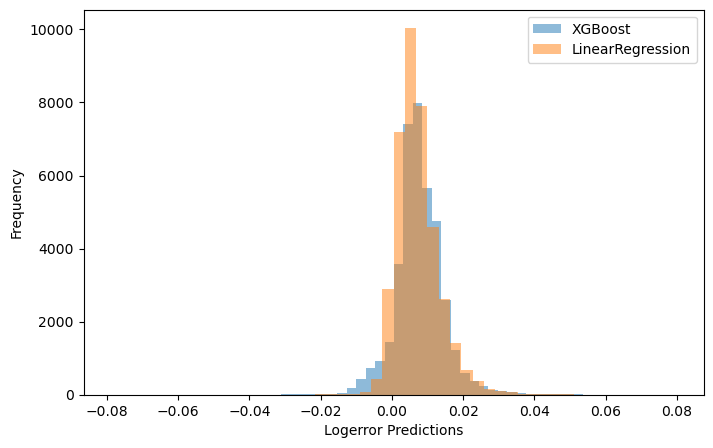

In [140]:
plt.figure(figsize=(8,5))
plt.hist(predictions_df["XGBoost"], bins=50, alpha=0.5, label="XGBoost")
plt.hist(predictions_df["LinearRegression"], bins=50, alpha=0.5, label="LinearRegression")
plt.xlabel("Logerror Predictions")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [142]:
sample_submission.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [144]:
properties_2016_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,10754147,0.0,0.0,1572.0,1539.0,6037.0,0.0,0.0,85768.0,269.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,1963.0,0.0,3991.78
1,10759547,0.0,0.0,1572.0,1539.0,6037.0,0.0,0.0,4083.0,261.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,1963.0,0.0,3991.78
2,10843547,0.0,0.0,73026.0,1539.0,6037.0,0.0,0.0,63085.0,47.0,6.037703e+07,51617.0,3101.0,96095.0,0.0,1963.0,0.0,20800.37
3,10859147,0.0,0.0,5068.0,1539.0,6037.0,0.0,0.0,7521.0,47.0,6.037141e+07,12447.0,3101.0,96424.0,0.0,1948.0,1.0,14557.57
4,10879947,0.0,0.0,1776.0,1539.0,6037.0,0.0,0.0,8512.0,31.0,6.037123e+07,12447.0,3101.0,96450.0,0.0,1947.0,0.0,5725.17


In [146]:
best_models

{'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=4, num_parallel_tree=None, ...),
 'LinearRegression': LinearRegression()}

In [148]:
best_model = best_models['XGBoost']

X_test_2016 = properties_2016_cleaned.drop(columns=['parcelid'], errors='ignore')
X_test_2017 = properties_2017_cleaned.drop(columns=['parcelid'], errors='ignore')

X_test_2016.insert(0, 'transactiondate', np.nan)
X_test_2017.insert(0, 'transactiondate', np.nan)

submission = pd.DataFrame()

submission['ParcelId'] = properties_2016_cleaned['parcelid'].astype(int)

In [149]:
X_test_2016.head()

,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,garagecarcnt,garagetotalsqft,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,numberofstories,taxamount
0,NaN,0.0,0.0,1572.0,1539.0,6037.0,0.0,0.0,85768.0,269.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,1963.0,0.0,3991.78
1,NaN,0.0,0.0,1572.0,1539.0,6037.0,0.0,0.0,4083.0,261.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,1963.0,0.0,3991.78
2,NaN,0.0,0.0,73026.0,1539.0,6037.0,0.0,0.0,63085.0,47.0,6.037703e+07,51617.0,3101.0,96095.0,0.0,1963.0,0.0,20800.37
3,NaN,0.0,0.0,5068.0,1539.0,6037.0,0.0,0.0,7521.0,47.0,6.037141e+07,12447.0,3101.0,96424.0,0.0,1948.0,1.0,14557.57
4,NaN,0.0,0.0,1776.0,1539.0,6037.0,0.0,0.0,8512.0,31.0,6.037123e+07,12447.0,3101.0,96450.0,0.0,1947.0,0.0,5725.17


In [152]:
submission.head()

,ParcelId
0,10754147
1,10759547
2,10843547
3,10859147
4,10879947


In [154]:
for col in ['201610', '201611', '201612']:
    X_test_2016['transactiondate'] = int(col)
    predictions = best_model.predict(X_test_2016)
    submission[col] = predictions

In [155]:
submission.head()

,ParcelId,201610,201611,201612
0,10754147,0.003140,0.003140,0.003140
1,10759547,0.004372,0.004372,0.004372
2,10843547,-0.030835,-0.030835,-0.030835
3,10859147,0.006052,0.006052,0.006052
4,10879947,-0.003497,-0.003497,-0.003497


In [156]:
predictions_2017 = pd.DataFrame()
predictions_2017['ParcelId'] = properties_2017_cleaned['parcelid'].astype(int)

for col in ['201710', '201711', '201712']:
    X_test_2017['transactiondate'] = int(col)  
    predictions_2017[col] = best_model.predict(X_test_2017)  

submission = submission.merge(predictions_2017, on='ParcelId', how='left')

In [157]:
submission.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.003140,0.003140,0.003140,0.005155,0.005155,0.005155
1,10759547,0.004372,0.004372,0.004372,0.005819,0.005819,0.005819
2,10843547,-0.030835,-0.030835,-0.030835,-0.025990,-0.025990,-0.025990
3,10859147,0.006052,0.006052,0.006052,0.007306,0.007306,0.007306
4,10879947,-0.003497,-0.003497,-0.003497,0.000765,0.000765,0.000765


In [158]:
submission.to_csv("submission.csv", index=False)